In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [5]:
train= pd.read_csv("../input/restaurant-revenue-prediction/train.csv.zip")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [8]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [9]:
train_1= train[["Open Date", "revenue"]]
train_1['ds']= train_1['Open Date']
train_1['y']= train_1['revenue']
train_1.drop(columns=["Open Date", "revenue"], inplace= True)
train_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,ds,y
0,07/17/1999,5653753.0
1,02/14/2008,6923131.0
2,03/09/2013,2055379.0
3,02/02/2012,2675511.0
4,05/09/2009,4316715.0


In [10]:
m= Prophet()
m.fit(train_1)
future= m.make_future_dataframe(periods=365)
future.tail()


,ds
497,2015-01-21
498,2015-01-22
499,2015-01-23
500,2015-01-24
501,2015-01-25


In [11]:
forecast= m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
497,2015-01-21,3.236645e+06,5.617221e+05,5.762198e+06
498,2015-01-22,2.799376e+06,-4.374139e+04,5.688019e+06
499,2015-01-23,3.704817e+06,1.054565e+06,6.489777e+06
500,2015-01-24,2.904272e+06,1.046370e+05,5.666589e+06
501,2015-01-25,4.767549e+06,1.982005e+06,7.565952e+06


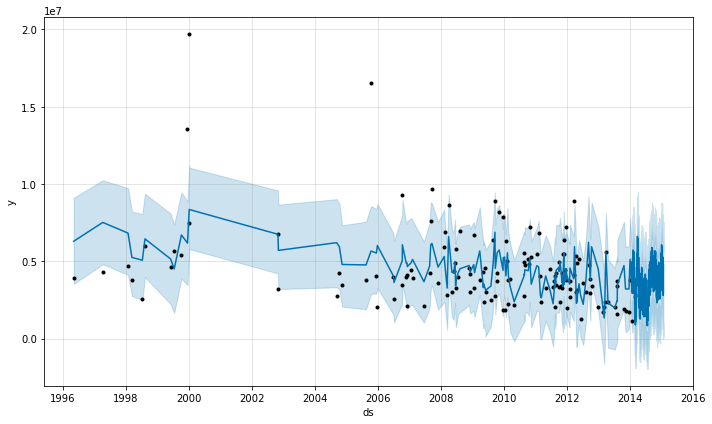

In [12]:
fig1= m.plot(forecast)

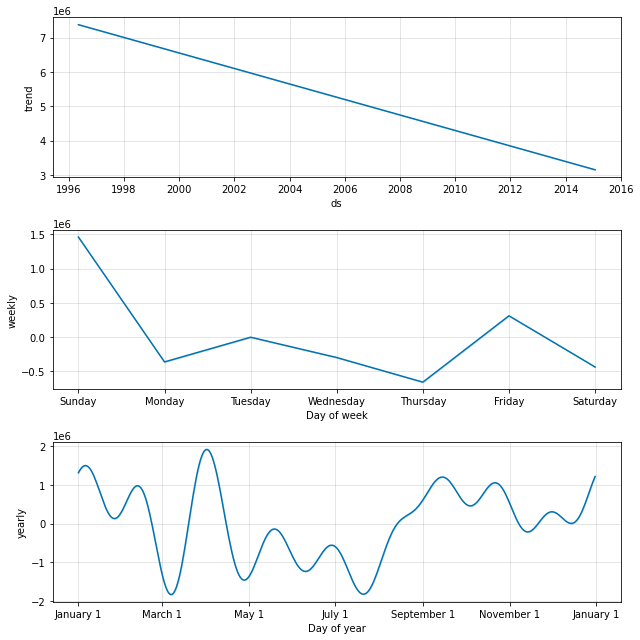

In [13]:
fig2 = m.plot_components(forecast)


In [14]:
m = Prophet(changepoint_prior_scale=2.5)
m.fit(train_1)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [15]:
# Calculate root mean squared error.
print('RMSE: %f' % np.sqrt(np.mean((forecast['yhat']-train_1['y'])**2)) )


RMSE: 3068584.395847


**Et avec pycaret??**
Let's try 

In [16]:
!pip install pycaret

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
from pycaret.regression import *
prr= setup(train, target= 'revenue')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1787
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(137, 43)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,32
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
compare_models()

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:03:46
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,Almost Finished


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,1.363357e+06,3.784009e+12,1.818288e+06,2.910000e-02,0.4024,3.461000e-01,0.0351
1,AdaBoost Regressor,1.408976e+06,3.628197e+12,1.791207e+06,2.140000e-02,0.4066,3.812000e-01,0.1375
2,Elastic Net,1.376829e+06,3.459450e+12,1.753415e+06,1.830000e-02,0.3997,3.760000e-01,0.0127
3,Support Vector Machine,1.461331e+06,4.367982e+12,1.946012e+06,-7.520000e-02,0.4365,3.764000e-01,0.0119
4,Bayesian Ridge,1.518329e+06,4.257419e+12,1.940474e+06,-9.910000e-02,0.4526,4.310000e-01,0.0130
5,Random Forest,1.512114e+06,4.017145e+12,1.910955e+06,-1.582000e-01,0.4227,4.036000e-01,0.3807
6,Passive Aggressive Regressor,1.536569e+06,4.792579e+12,2.049833e+06,-2.220000e-01,0.4518,3.806000e-01,0.1695
7,K Neighbors Regressor,1.449985e+06,4.124265e+12,1.921634e+06,-3.468000e-01,0.4184,3.719000e-01,0.0078
8,Gradient Boosting Regressor,1.615648e+06,4.707620e+12,2.090986e+06,-4.627000e-01,0.4476,4.232000e-01,0.1145
9,Extreme Gradient Boosting,1.631310e+06,4.802807e+12,2.120209e+06,-5.592000e-01,0.4548,4.293000e-01,0.1832


LightGBMError: Do not support non-ASCII characters in feature name.

In [22]:
hr = create_model('huber') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,995612.2980,2111769772638.8503,1453192.9578,0.0766,0.3059,0.2159
1,1234436.4162,2437594468611.6704,1561279.7535,0.2425,0.4087,0.3924
2,1391356.3306,2649156372349.6099,1627622.9208,0.0647,0.3689,0.3418
3,961448.8845,1622099969318.3765,1273616.8848,0.1836,0.3269,0.2732
4,2338008.8228,12623033447732.2383,3552890.8578,-0.1073,0.5982,0.4273
5,1123402.9501,1557426688829.9521,1247969.0256,0.0150,0.3695,0.3587
6,833606.6046,1101695134919.7588,1049616.6609,-0.4183,0.2738,0.2310
7,1865258.4267,4946277175644.4902,2224022.7462,0.0986,0.5244,0.5461
8,1481820.3132,4521048159624.5654,2126275.6547,0.1499,0.4745,0.4229
9,1408621.9523,4269984246559.1841,2066394.0202,-0.0143,0.3734,0.2517


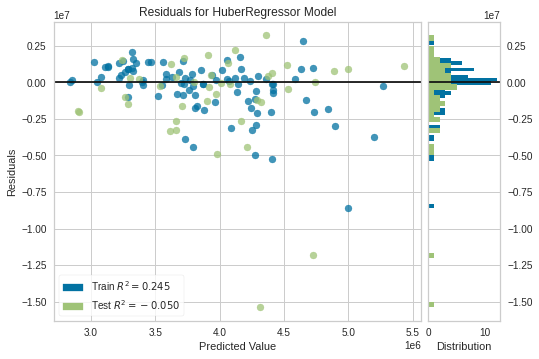

In [39]:
plot_model(hr)

In [29]:
pred= predict_model(hr)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,1.963000e+06,1.210783e+13,3.479631e+06,-0.0504,0.5295,0.395


In [32]:
# finalize a model
hr_final = finalize_model(hr)

# importing unseen data 
test = pd.read_csv('../input/restaurant-revenue-prediction/test.csv.zip') 

# generate predictions on unseen data
pred_test = predict_model(hr_final, data = test)
pred_test.head()
 

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Label
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3.939555e+06
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3.461979e+06
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3.833707e+06
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,3.702950e+06
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,4.468194e+06


In [36]:
sub= pd.read_csv("../input/restaurant-revenue-prediction/sampleSubmission.csv")
sub["Prediction"]= pred_test["Label"]
sub.to_csv("submission_revenues_restau.csv", index= False)
sub.head()

,Id,Prediction
0,0,3939555
1,1,3461979
2,2,3833706
3,3,3702949
4,4,4468193
